In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
lines = []

with open('words.txt') as f:
    lines = f.readlines()

In [4]:
letter_distribution = []

for i in range(5):
    letters = {"A": 0, "B": 0, "C": 0, "D": 0, "E": 0, "F": 0, "G": 0, "H": 0, "I": 0, "J": 0, "K": 0, 
                        "L": 0, "M": 0, "N": 0, "O": 0, "P": 0, "Q": 0, "R": 0, "S": 0, "T": 0, "U": 0, "V": 0, 
                        "W": 0, "X": 0, "Y": 0, "Z": 0}

    for idx, line in enumerate(lines):
        line = line.replace("\n", "")
        
        valid_word = True
        
        for letter in line:
            if not letter in letters:
                valid_word = False
                break

        if len(line) > 0 and valid_word:
            letter = line[i].upper()
            
            try:
                letters[letter] += 1
            except:
                print("letter: " + letter + ", position: " + str(idx))
    
    letter_distribution.append(letters)


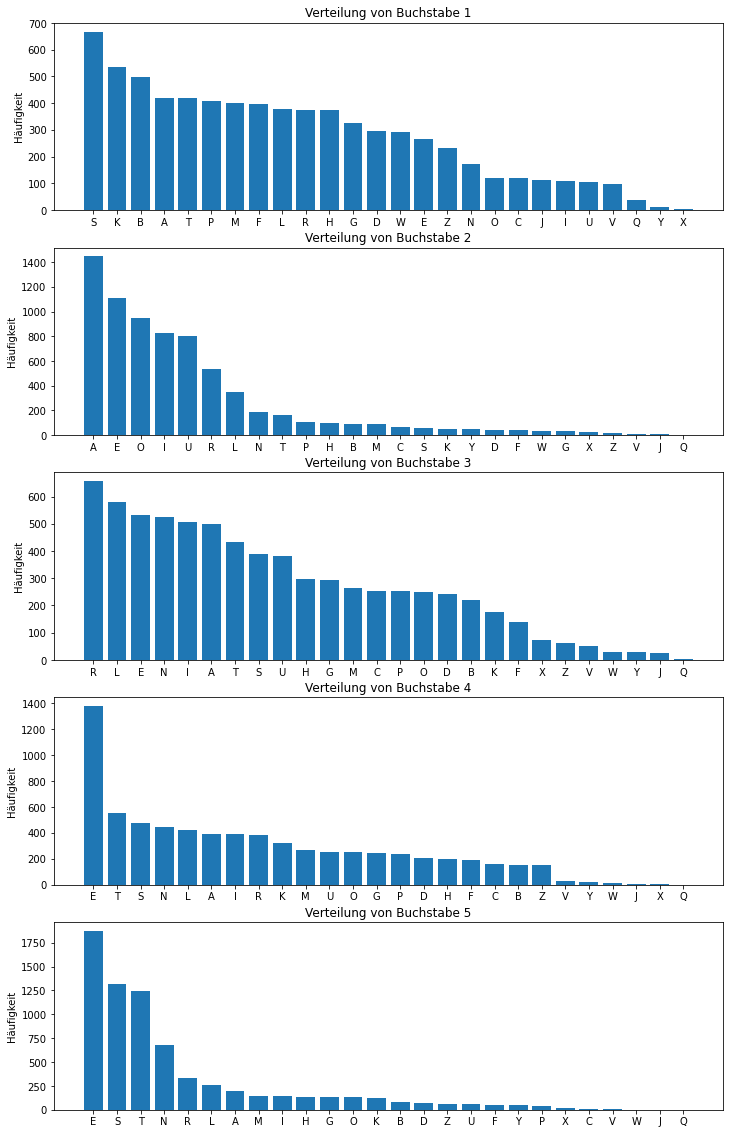

In [5]:
fig, axs = plt.subplots(len(letter_distribution))
fig.set_size_inches(12, 20)

for idx, distribution in enumerate(letter_distribution):

    distribution_sorted = {k: v for k, v in sorted(distribution.items(), key=lambda item: -item[1])}
    
    x = [i + 1 for i in range(26)]

    p = axs[idx].bar(x, distribution_sorted.values())
    axs[idx].set_xticks(x, labels=distribution_sorted.keys())
    axs[idx].set_ylabel("Häufigkeit")
    axs[idx].set_title("Verteilung von Buchstabe " + str(idx + 1))

plt.show()

In [6]:
letters = {"A": [0,0,0,0,0,0,0], "B": [0,0,0,0,0,0,0], "C": [0,0,0,0,0,0,0], "D": [0,0,0,0,0,0,0], "E": [0,0,0,0,0,0,0],
           "F": [0,0,0,0,0,0,0], "G": [0,0,0,0,0,0,0], "H": [0,0,0,0,0,0,0], "I": [0,0,0,0,0,0,0], "J": [0,0,0,0,0,0,0], 
           "K": [0,0,0,0,0,0,0], "L": [0,0,0,0,0,0,0], "M": [0,0,0,0,0,0,0], "N": [0,0,0,0,0,0,0], "O": [0,0,0,0,0,0,0],
           "P": [0,0,0,0,0,0,0], "Q": [0,0,0,0,0,0,0], "R": [0,0,0,0,0,0,0], "S": [0,0,0,0,0,0,0], "T": [0,0,0,0,0,0,0],
           "U": [0,0,0,0,0,0,0], "V": [0,0,0,0,0,0,0], "W": [0,0,0,0,0,0,0], "X": [0,0,0,0,0,0,0], "Y": [0,0,0,0,0,0,0],
           "Z": [0,0,0,0,0,0,0]}

number_valid_words = 0

for line in lines:
    line = line.replace("\n", "")
    
    valid_word = True
    
    for letter in line: 
        if not letter in letters:
            valid_word = False
    
    if valid_word:
        number_valid_words += 1
        
        for letter in line:
            letters[letter][0] += 1
            letters[letter][1] += 1
            
        for idx, letter in enumerate(line):
            letters[letter][idx + 2] += 1
            

for letter in letters.items():
    letter[1][1] /= (number_valid_words * 5)
    letter[1][2] /= number_valid_words
    letter[1][3] /= number_valid_words
    letter[1][4] /= number_valid_words
    letter[1][5] /= number_valid_words
    letter[1][6] /= number_valid_words
    
letters_sorted = {k: v for k, v in sorted(letters.items(), key=lambda item: -item[1][0])}

In [61]:
import pandas as pd

pd.DataFrame.from_dict(
    letters_sorted, 
    columns=["count", "freq_total", "freq_pos1", "freq_pos2", "freq3_pos", "freq_pos4", "freq_pos5"], 
    orient="index"
)

,count,freq_total,freq_pos1,freq_pos2,freq3_pos,freq_pos4,freq_pos5
E,5155,0.143814,0.036825,0.155252,0.074487,0.191659,0.260845
A,2955,0.082438,0.058446,0.201702,0.069884,0.054959,0.027200
S,2913,0.081267,0.093179,0.008090,0.054540,0.066397,0.184126
T,2809,0.078365,0.058307,0.022179,0.060399,0.077417,0.173525
R,2285,0.063747,0.052309,0.074906,0.091505,0.053006,0.047008
N,2011,0.056103,0.023992,0.026224,0.073511,0.062491,0.094295
L,1994,0.055628,0.052727,0.048821,0.080904,0.059004,0.036686
I,1981,0.055266,0.015344,0.115637,0.070721,0.054680,0.019947
O,1697,0.047343,0.016739,0.132376,0.034593,0.035012,0.017994
U,1598,0.044581,0.014507,0.111452,0.053285,0.035570,0.008090
